## Tools and Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
import seaborn as sns

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

## Dataset

In [14]:
stockData = pd.read_csv("ML_Dataset2.csv")
stockData.head(8)

,Player,Team,Stat,Role,Best Attribute,Actual Result
0,1,1,1.0,0,0.0,1
1,2,1,1.0,1,1.0,1
2,3,1,0.0,2,0.0,1
3,4,1,0.0,3,2.0,1
4,5,2,1.0,0,0.0,0
5,6,2,0.0,3,1.0,0
6,7,2,1.0,5,0.0,0
7,8,2,0.0,1,1.0,0


## Basic EDA

before we can proceed to our Naive Bayes, we must confirm that the features we have are independent and are not correlated.

<AxesSubplot:>

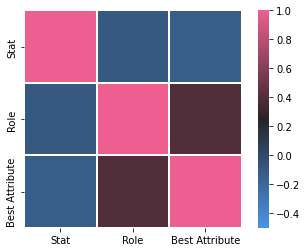

In [15]:
corr = stockData.iloc[:,2:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

## Calculate Prior P(Y)
Logic for this would be P(Y) = totalY/totalN; Y = Win | Lose

In [16]:
def calculate_prior(training_d,Y):
    classes = sorted(list(training_d[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(training_d[training_d[Y]==i])/len(training_d))
    return prior

## Calculate P(X|Y) 
logic here is P(X|Y) = totalX/totalN; X = x0 | x1 | x2 (columns)

In [17]:
def calculate_likelihood(training_d, feat_name, feat_val, Y, label):
    training_d = training_d[training_d[Y]==label]
    p_x_given_y = len(training_d[training_d[feat_name]==feat_val]) / len(training_d)
    return p_x_given_y

## Calculate Probability P(X1|Y)P(X2|Y)P(X3|Y)...P(Xn|Y) * P(Y)

In [18]:
def naive_bayes_categorical(training_data, X, Y):
    #getting the feature names
    features = list(training_data.columns)[2:-1]
    
    prior = calculate_prior(training_data, Y)
    
    probW = []
    probL = []
    Ypred = []
    data = [[],[],[]]
    accumulatedP = [],[]
    for x in X:
        
        labels = sorted(list(training_data[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            #calculate P(X1|Y)P(X2|Y)P(X3|Y)...P(Xn|Y)
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood(training_data, features[i], x[i], Y, labels[j])
        post_prob = [1]*len(labels)
        
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
               
    
        Ypred.append(np.argmax(post_prob))
        probW.append(post_prob[1])
        probL.append(post_prob[0])
    
    #Since there are 4 heroes per team, their probability are all multiplied
    for i in range(floor(len(X)/4)):
           accumulatedP[1].append(probW[i*4]*probW[(i*4)+1]*probW[(i*4)+2]*probW[(i*4)+3]) 
           accumulatedP[0].append(probL[i*4]*probL[(i*4)+1]*probL[(i*4)+2]*probL[(i*4)+3])
           # We predict win if their win prob is greater than their lose prob.
           if(accumulatedP[1][i] >= accumulatedP[0][i]):
               data[2].append(1)
           else:
               data[2].append(0)

    data[0] = accumulatedP[0]
    data[1] = accumulatedP[1]
    
    return data
        

## Testing For NB

In [19]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(stockData, test_size=.3, shuffle=False)
X_test = test.iloc[:,2:-1].values
Y_test = test.iloc[:,-1].values

Ypred = naive_bayes_categorical(train, X=X_test, Y="Actual Result")

match_y =[]
for i in range(floor(len(X_test)/4)):
    match_y.append(Y_test[i*4])

result = pd.DataFrame({"Prediction":Ypred[2],"Win Probability": Ypred[1], "Lose Probability": Ypred[0],"Actual Result":match_y})

# Calculate Accuracy by the total correct predictions divided by the total Matches
acc = np.sum(result["Prediction"] == result["Actual Result"]) / len(result["Actual Result"])
print_full(result)
print("Accuracy: ", acc)



     Prediction  Win Probability  Lose Probability  Actual Result
0             1     4.478241e-09      4.223054e-09              1
1             0     7.081609e-08      1.317188e-07              0
2             1     4.765557e-07      3.754329e-07              0
3             1     8.242753e-08      7.793552e-08              1
4             0     6.417177e-08      7.793552e-08              0
5             0     5.021447e-08      6.230834e-08              1
6             0     7.135518e-08      7.850027e-08              1
7             0     6.686429e-08      7.575550e-08              0
8             1     2.246106e-08      1.661192e-08              1
9             0     2.117926e-07      2.896584e-07              0
10            1     2.246106e-08      1.661192e-08              1
11            1     8.242753e-08      7.793552e-08              0
12            0     2.043025e-07      2.382419e-07              0
13            0     1.768589e-07      2.399683e-07              1
14        